# 1. Import  Library

In [97]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Package untuk koneksi dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

# Package Untuk Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Package Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Package Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Untuk validasi model
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Data Collection

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Python/Prediksi-Pembelian-Produk/online_shoppers_intention.csv")

# 3. Data Understanding

## A. Pemeriksaan Struktur Data

In [5]:
print("Dimensi dataset (baris, kolom):", df.shape)
print("\nInformasi tipe data dan non-null values:")
df.info()

Dimensi dataset (baris, kolom): (12330, 18)

Informasi tipe data dan non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int

## B. Eksplorasi Distribusi Data

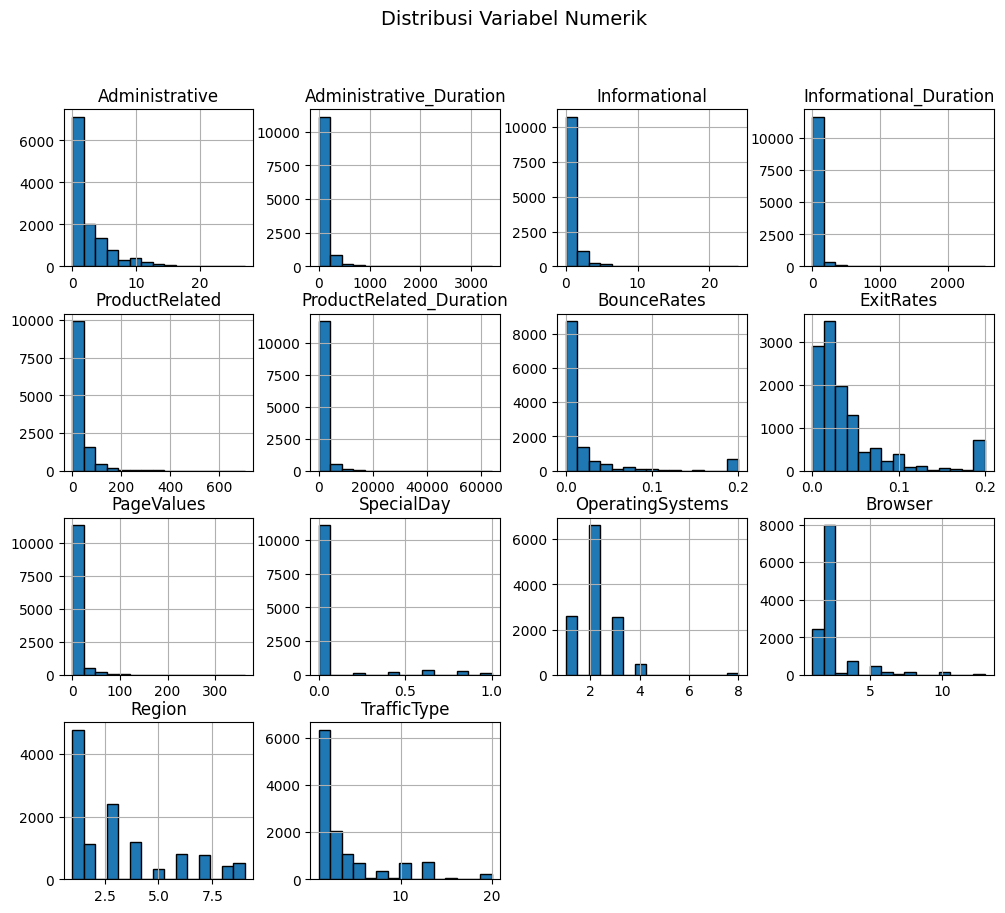

/tmp/ipython-input-2983559930.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


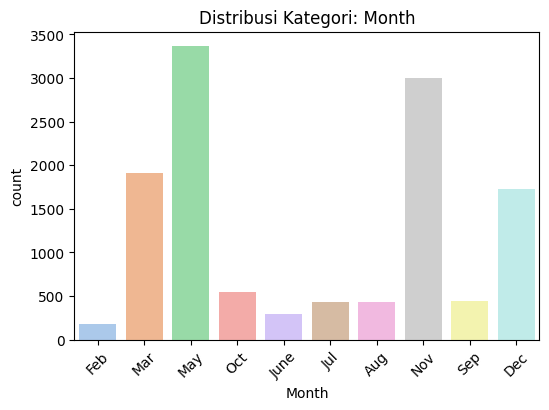

/tmp/ipython-input-2983559930.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


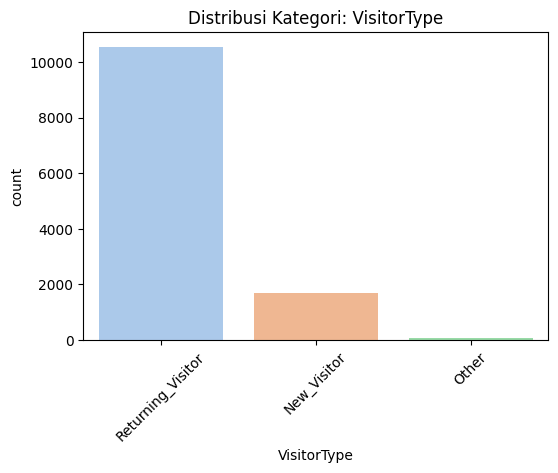

/tmp/ipython-input-2983559930.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


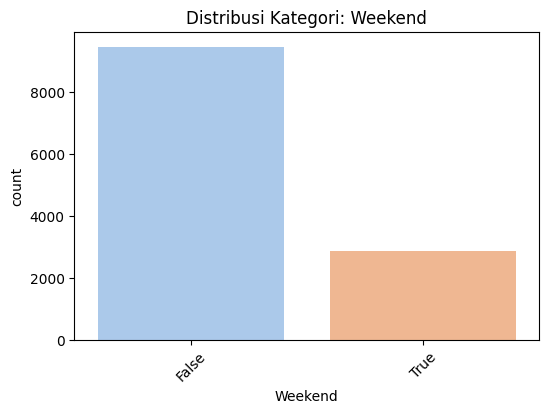

/tmp/ipython-input-2983559930.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


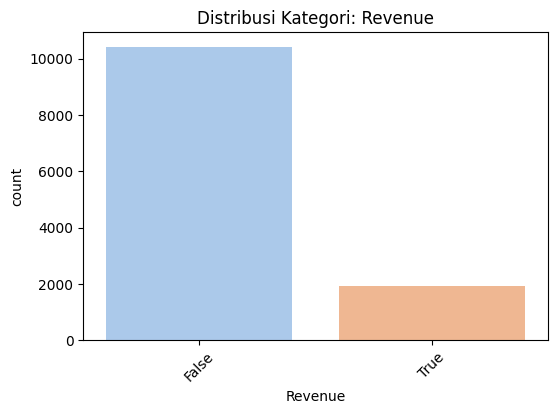

In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

df[numerical_cols].hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik', fontsize=14)
plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.show()

## C. Analisis Distribusi Kelas

Jumlah data Revenue = True: 1908
Jumlah data Revenue = False: 10422


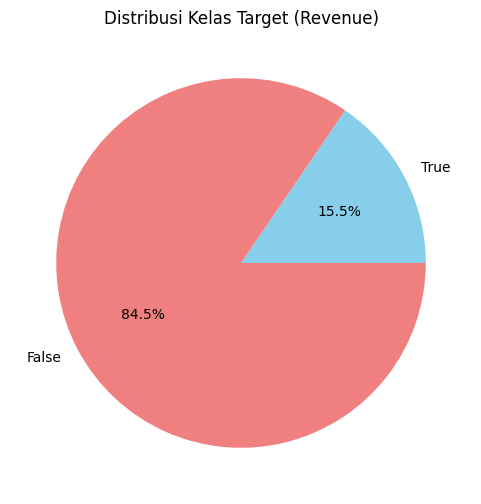

In [7]:
revenue_true = df[df['Revenue'] == True]
revenue_false = df[df['Revenue'] == False]
print("Jumlah data Revenue = True:", len(revenue_true))
print("Jumlah data Revenue = False:", len(revenue_false))

plt.figure(figsize=(6,6))
plt.pie([len(revenue_true), len(revenue_false)], labels=['True', 'False'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Kelas Target (Revenue)')
plt.show()

## D. Sampel Data

In [8]:
df.round(2).head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.00,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.67,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.50,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.22,0.02,0.02,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.00,0.20,0.20,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.00,0.20,0.20,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.00,0.00,0.10,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.00,0.00,0.02,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# 4. Data Preprocessing

## A. Deteksi dan Penanganan Duplikat Data

In [9]:
print(f"Jumlah data sebelum proses: {len(df)}")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")
duplikat_data = df[df.duplicated()]

Jumlah data sebelum proses: 12330
Jumlah data duplikat: 125


In [10]:
duplikat_data.round(2).head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
540,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,False,False
554,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
589,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False


In [11]:
df.drop_duplicates(inplace=True)
print("Data duplikat telah dihapus.")
print(f"Jumlah data setelah penghapusan duplikat: {len(df)}")
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Data duplikat telah dihapus.
Jumlah data setelah penghapusan duplikat: 12205
Jumlah data duplikat: 0


## B. Deteksi dan Penanganan Outlier (Metode IQR)

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    total_data = len(df[col])
    percentage = (outlier_count / total_data) * 100

    outlier_summary.append({
        'Variabel': col,
        'Jumlah Outlier': outlier_count,
        'Persentase (%)': round(percentage, 2),
        'Tindakan': 'Capping (Winsorizing)' if outlier_count > 0 else 'Tidak Ada Outlier'
    })

outlier_df = pd.DataFrame(outlier_summary)

print("Tabel Deteksi Outlier:")
display(outlier_df)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

print("\nOutlier ekstrem telah ditangani menggunakan metode Capping (Winsorizing).")

Tabel Deteksi Outlier:


,Variabel,Jumlah Outlier,Persentase (%),Tindakan
0,Administrative,404,3.31,Capping (Winsorizing)
1,Administrative_Duration,1149,9.41,Capping (Winsorizing)
2,Informational,2631,21.56,Capping (Winsorizing)
3,Informational_Duration,2405,19.71,Capping (Winsorizing)
4,ProductRelated,1007,8.25,Capping (Winsorizing)
5,ProductRelated_Duration,951,7.79,Capping (Winsorizing)
6,BounceRates,1428,11.70,Capping (Winsorizing)
7,ExitRates,1325,10.86,Capping (Winsorizing)
8,PageValues,2730,22.37,Capping (Winsorizing)
9,SpecialDay,1249,10.23,Capping (Winsorizing)



Outlier ekstrem telah ditangani menggunakan metode Capping (Winsorizing).


## C. Encoding Variabel Kategorikal

In [13]:
df_encoded = df.copy()

label_encoder = LabelEncoder()
df_encoded['Month'] = label_encoder.fit_transform(df_encoded['Month'])
df_encoded['VisitorType'] = label_encoder.fit_transform(df_encoded['VisitorType'])

df_encoded['Weekend'] = df_encoded['Weekend'].map({False: 0, True: 1})
df_encoded['Revenue'] = df_encoded['Revenue'].map({False: 0, True: 1})
print("Encoding variabel kategorikal selesai.\n")

Encoding variabel kategorikal selesai.



In [14]:
df_encoded[['Month', 'VisitorType', 'Weekend', 'Revenue']].round(2).head(10)

,Month,VisitorType,Weekend,Revenue
0,2,2,0,0
1,2,2,0,0
2,2,2,0,0
3,2,2,0,0
4,2,2,1,0
5,2,2,0,0
6,2,2,0,0
7,2,2,1,0
8,2,2,0,0
9,2,2,0,0


## D. Feature Scaling (StandardScaler)

In [15]:
numeric_features  = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])
print("Proses normalisasi data numerik selesai")

Proses normalisasi data numerik selesai


In [16]:
df_scaled[numeric_features].round(2).head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.76,-0.72,0.0,0.0,-1.04,-0.97,2.14,2.21,0.0,0.0
1,-0.76,-0.72,0.0,0.0,-1.00,-0.90,-0.73,2.21,0.0,0.0
2,-0.76,-0.72,0.0,0.0,-1.04,-0.97,2.14,2.21,0.0,0.0
3,-0.76,-0.72,0.0,0.0,-1.00,-0.96,2.14,2.21,0.0,0.0
4,-0.76,-0.72,0.0,0.0,-0.68,-0.36,0.65,0.50,0.0,0.0
5,-0.76,-0.72,0.0,0.0,-0.32,-0.82,0.36,-0.37,0.0,0.0
6,-0.76,-0.72,0.0,0.0,-1.04,-0.97,2.14,2.21,0.0,0.0
7,-0.42,-0.72,0.0,0.0,-1.08,-0.97,2.14,2.21,0.0,0.0
8,-0.76,-0.72,0.0,0.0,-1.00,-0.93,-0.73,2.21,0.0,0.0
9,-0.76,-0.72,0.0,0.0,-0.96,-0.25,-0.73,-0.45,0.0,0.0


# 5. Klasifikasi Menggunakan K-Fold (k=5)

In [90]:
X = df_scaled.drop(columns=['Revenue'])
y = df_scaled['Revenue']

print("Ukuran data fitur:", X.shape)
print("Ukuran data target:", y.shape)

Ukuran data fitur: (12205, 17)
Ukuran data target: (12205,)


In [91]:
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
results_5 = []
acc_dist_5 = {}
models = {
    "k-NN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "k-NN (k=7)": KNeighborsClassifier(n_neighbors=7),
    "k-NN (k=9)": KNeighborsClassifier(n_neighbors=9),
    "k-NN (k=11)": KNeighborsClassifier(n_neighbors=11),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=kf5, scoring='accuracy')
    prec = cross_val_score(model, X, y, cv=kf5, scoring='precision')
    rec = cross_val_score(model, X, y, cv=kf5, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=kf5, scoring='f1')

    results_5.append({
        'Model': name,
        'Accuracy': acc.mean(),
        'Precision': prec.mean(),
        'Recall': rec.mean(),
        'F1-Score': f1.mean(),
        'Std Dev.': acc.std()
    })
    acc_dist_5[name] = acc

df_results_5 = pd.DataFrame(results_5).round(4)
print("Proses K-Fold Cross Validation (k=5) selesai")

Proses K-Fold Cross Validation (k=5) selesai


In [92]:
df_results_5.round(2).head(7)

,Model,Accuracy,Precision,Recall,F1-Score,Std Dev.
0,k-NN (k=3),0.81,0.30,0.19,0.23,0.01
1,k-NN (k=5),0.82,0.35,0.16,0.22,0.00
2,k-NN (k=7),0.83,0.38,0.13,0.20,0.00
3,k-NN (k=9),0.84,0.41,0.12,0.18,0.01
4,k-NN (k=11),0.84,0.41,0.11,0.17,0.01
5,Decision Tree,0.76,0.27,0.30,0.28,0.01
6,Naive Bayes,0.70,0.27,0.51,0.35,0.01


# 6. Klasifikasi Menggunakan K-Fold (k=10)

In [93]:
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)
results_10 = []
acc_dist_10 = {}

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=kf10, scoring='accuracy')
    prec = cross_val_score(model, X, y, cv=kf10, scoring='precision')
    rec = cross_val_score(model, X, y, cv=kf10, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=kf10, scoring='f1')

    results_10.append({
        'Model': name,
        'Accuracy': acc.mean(),
        'Precision': prec.mean(),
        'Recall': rec.mean(),
        'F1-Score': f1.mean(),
        'Std Dev.': acc.std()
    })
    acc_dist_10[name] = acc

df_results_10 = pd.DataFrame(results_10).round(4)
print("Proses K-Fold Cross Validation (k=10) selesai")

Proses K-Fold Cross Validation (k=10) selesai


In [94]:
df_results_10.round(2).head(7)

,Model,Accuracy,Precision,Recall,F1-Score,Std Dev.
0,k-NN (k=3),0.81,0.31,0.19,0.24,0.01
1,k-NN (k=5),0.82,0.36,0.16,0.22,0.01
2,k-NN (k=7),0.83,0.38,0.14,0.20,0.01
3,k-NN (k=9),0.84,0.43,0.13,0.19,0.01
4,k-NN (k=11),0.84,0.41,0.11,0.17,0.01
5,Decision Tree,0.77,0.28,0.30,0.29,0.01
6,Naive Bayes,0.70,0.27,0.51,0.35,0.02


# 7. Klasifikasi Menggunakan Split Validation 70% Train / 30% Test

In [101]:
results_7030 = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_7030.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

df_results_7030 = pd.DataFrame(results_7030).round(4)
print("Proses Split Validation (70% Train / 30% Test) selesai")

Proses Split Validation (70% Train / 30% Test) selesai


In [89]:
df_results_7030.round(2).head(7)

,Model,Accuracy,Precision,Recall,F1-Score
0,k-NN (k=3),0.80,0.30,0.20,0.24
1,k-NN (k=5),0.82,0.36,0.16,0.22
2,k-NN (k=7),0.82,0.33,0.13,0.19
3,k-NN (k=9),0.83,0.35,0.12,0.17
4,k-NN (k=11),0.83,0.36,0.10,0.15
5,Decision Tree,0.76,0.27,0.31,0.29
6,Naive Bayes,0.71,0.27,0.54,0.36


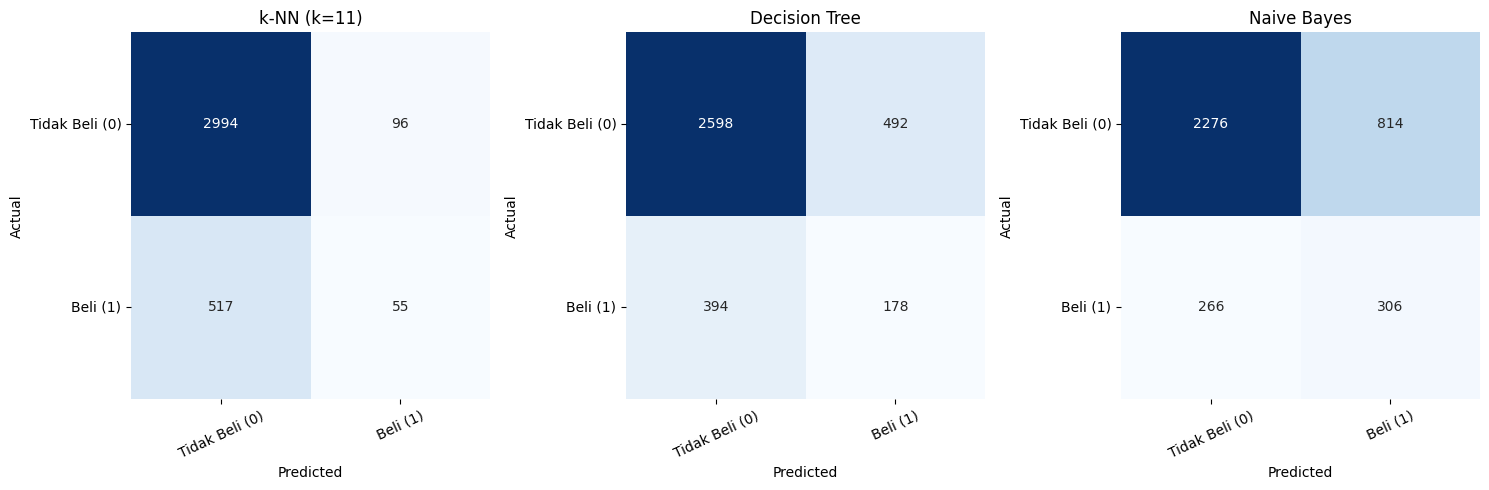

In [102]:
knn_best = df_results_7030[df_results_7030['Model'].str.contains("k-NN")].sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
selected_models = [knn_best, 'Decision Tree', 'Naive Bayes']
plt.figure(figsize=(15, 5))
cols = 3
rows = 1

for i, name in enumerate(selected_models, 1):
    model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name}", fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.xticks(ticks=[0.5, 1.5], labels=['Tidak Beli (0)', 'Beli (1)'], rotation=25)
    plt.yticks(ticks=[0.5, 1.5], labels=['Tidak Beli (0)', 'Beli (1)'], rotation=0)

plt.tight_layout()
plt.show()

# 8. Klasifikasi Menggunakan Split Validation 80% Train / 20% Test

In [103]:
results_8020 = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_8020.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

df_results_8020 = pd.DataFrame(results_8020).round(4)
print("Proses Split Validation (80% Train / 20% Test) selesai")

Proses Split Validation (80% Train / 20% Test) selesai


In [104]:
df_results_8020.round(2).head(7)

,Model,Accuracy,Precision,Recall,F1-Score
0,k-NN (k=3),0.80,0.29,0.18,0.22
1,k-NN (k=5),0.82,0.31,0.14,0.19
2,k-NN (k=7),0.82,0.29,0.11,0.16
3,k-NN (k=9),0.82,0.31,0.10,0.15
4,k-NN (k=11),0.83,0.35,0.10,0.15
5,Decision Tree,0.76,0.28,0.34,0.31
6,Naive Bayes,0.72,0.29,0.54,0.38


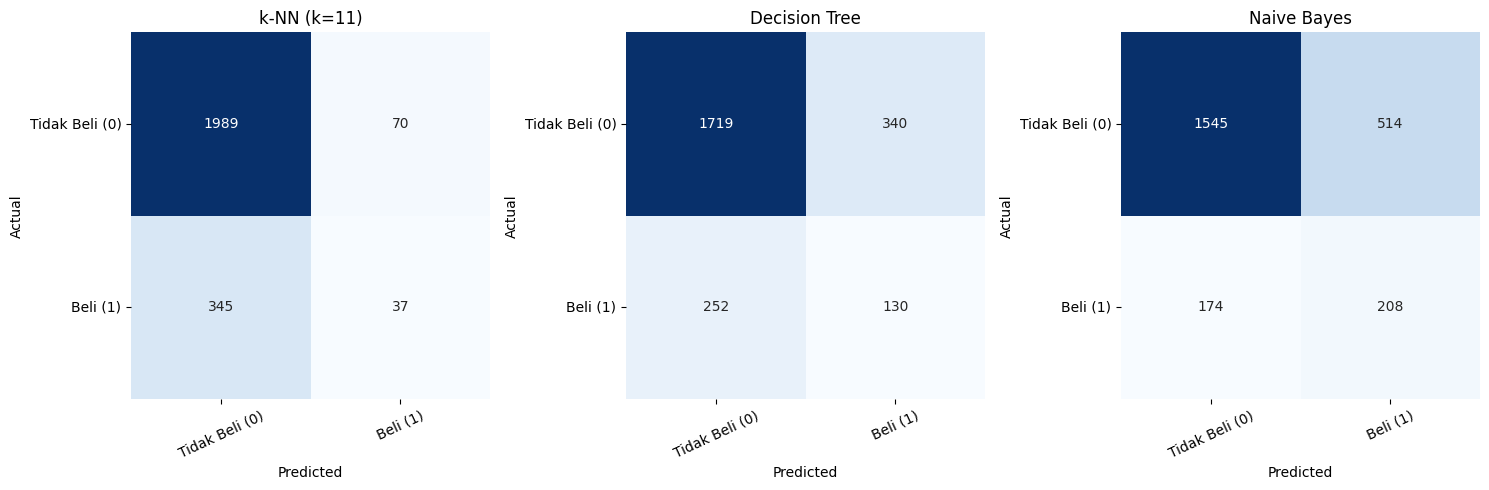

In [105]:
knn_best = df_results_8020[df_results_8020['Model'].str.contains("k-NN")].sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
selected_models = [knn_best, 'Decision Tree', 'Naive Bayes']
plt.figure(figsize=(15, 5))
cols = 3
rows = 1

for i, name in enumerate(selected_models, 1):
    model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name}", fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.xticks(ticks=[0.5, 1.5], labels=['Tidak Beli (0)', 'Beli (1)'], rotation=25)
    plt.yticks(ticks=[0.5, 1.5], labels=['Tidak Beli (0)', 'Beli (1)'], rotation=0)

plt.tight_layout()
plt.show()

# 9. Klasifikasi Menggunakan Split Validation 90% Train / 10% Test

In [106]:
results_9010 = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results_9010.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

df_results_9010 = pd.DataFrame(results_9010).round(4)
print("Proses Split Validation (90% Train / 10% Test) selesai")

Proses Split Validation (90% Train / 10% Test) selesai


In [107]:
df_results_9010.round(2).head(7)

,Model,Accuracy,Precision,Recall,F1-Score
0,k-NN (k=3),0.79,0.25,0.16,0.19
1,k-NN (k=5),0.81,0.29,0.13,0.18
2,k-NN (k=7),0.82,0.30,0.10,0.15
3,k-NN (k=9),0.83,0.34,0.10,0.16
4,k-NN (k=11),0.83,0.32,0.09,0.14
5,Decision Tree,0.76,0.26,0.28,0.27
6,Naive Bayes,0.71,0.28,0.53,0.37


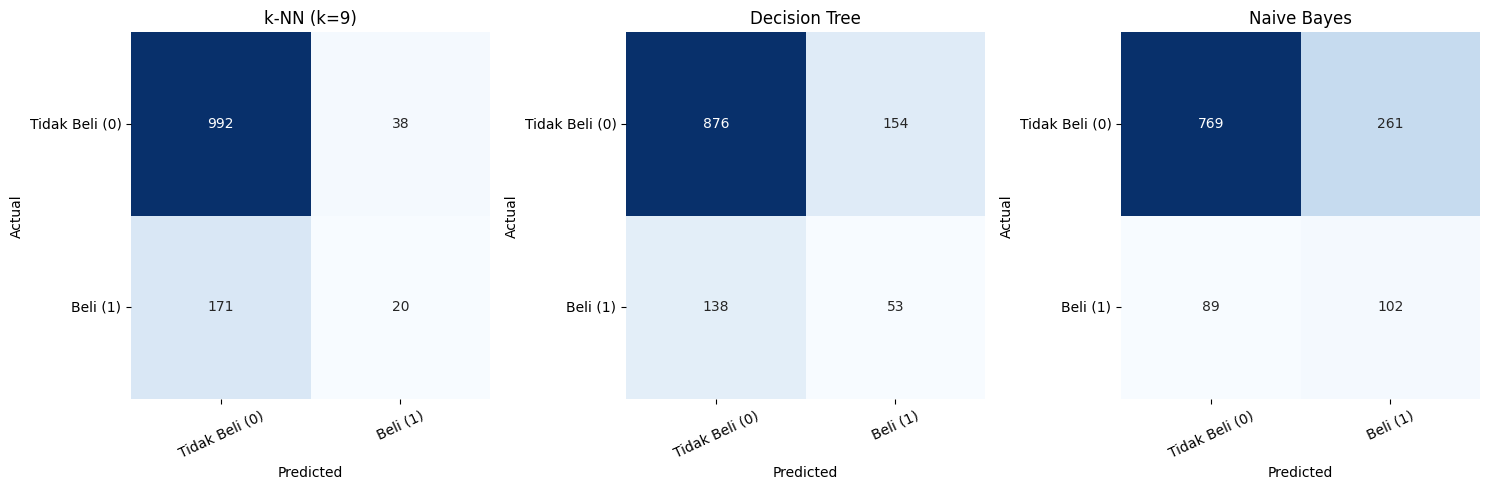

In [108]:
knn_best = df_results_9010[df_results_9010['Model'].str.contains("k-NN")].sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
selected_models = [knn_best, 'Decision Tree', 'Naive Bayes']
plt.figure(figsize=(15, 5))
cols = 3
rows = 1

for i, name in enumerate(selected_models, 1):
    model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name}", fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.xticks(ticks=[0.5, 1.5], labels=['Tidak Beli (0)', 'Beli (1)'], rotation=25)
    plt.yticks(ticks=[0.5, 1.5], labels=['Tidak Beli (0)', 'Beli (1)'], rotation=0)

plt.tight_layout()
plt.show()

# 10. Box Plot Distribusi Skor K-Fold Cross Validation

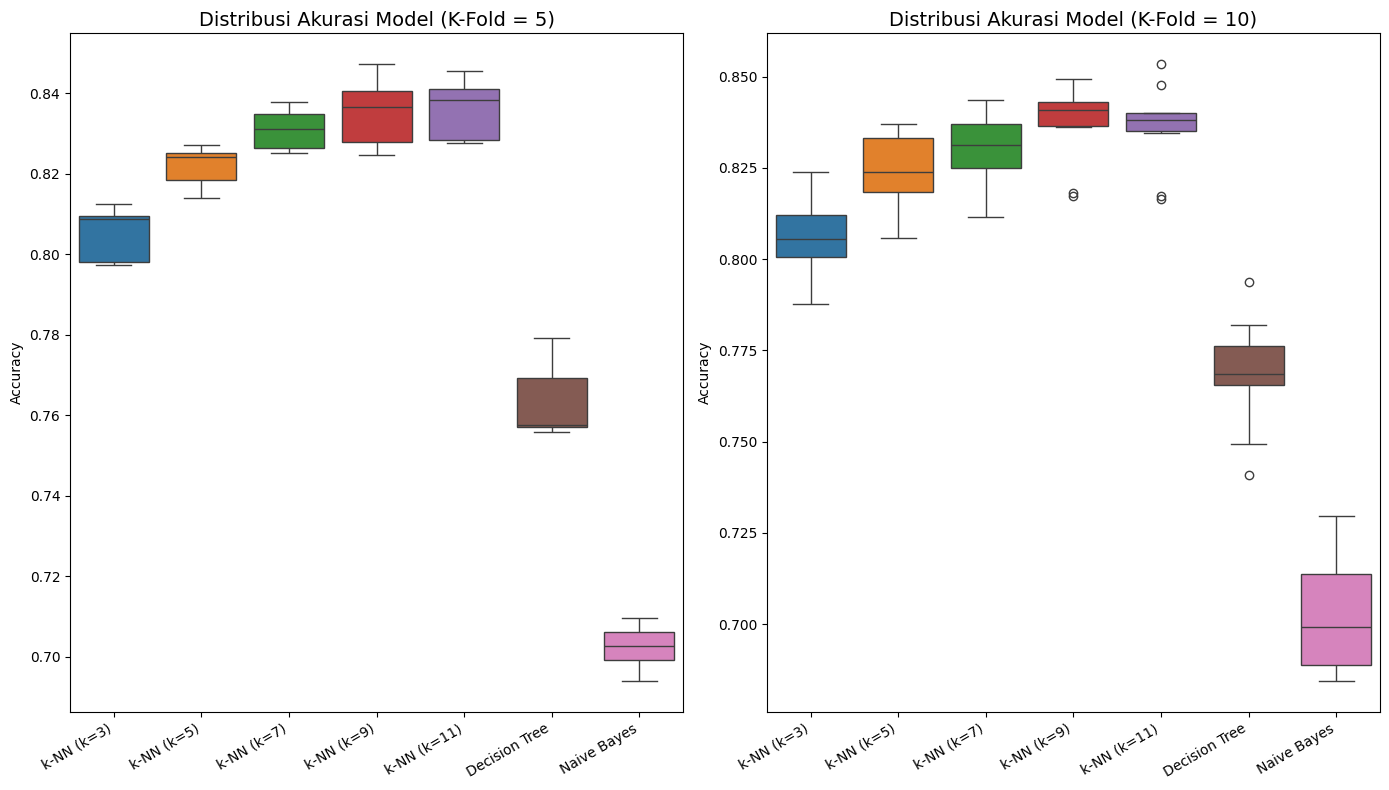

In [95]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=pd.DataFrame(acc_dist_5))
plt.title("Distribusi Akurasi Model (K-Fold = 5)", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha='right')

plt.subplot(1, 2, 2)
sns.boxplot(data=pd.DataFrame(acc_dist_10))
plt.title("Distribusi Akurasi Model (K-Fold = 10)", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

# 11. Bar Chart Perbandingan performa model

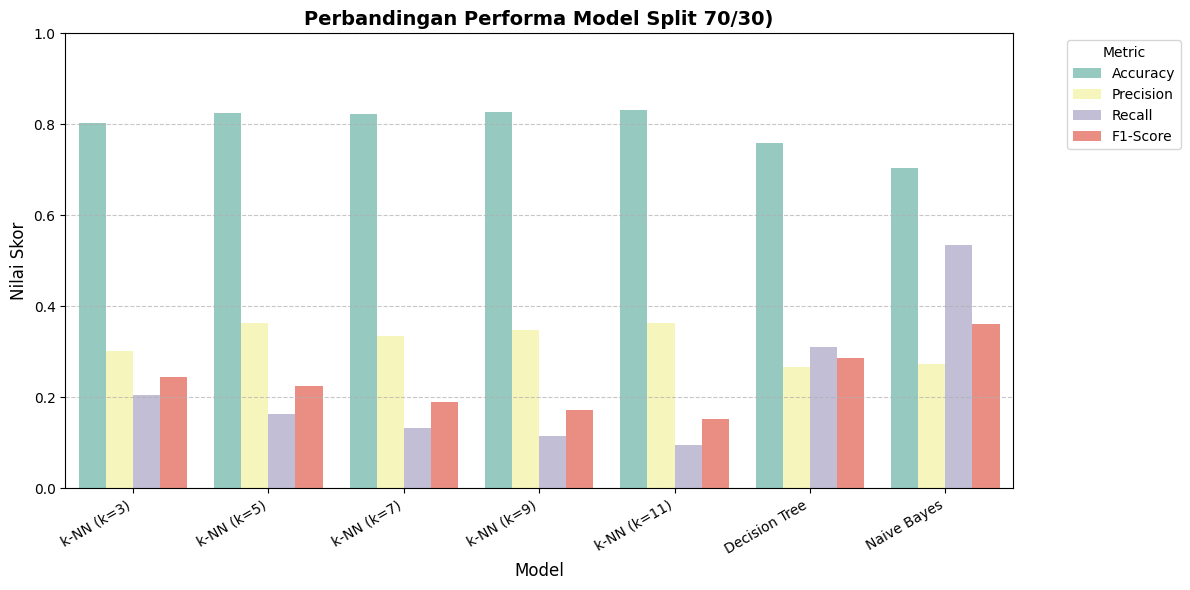

In [110]:
df_melt = df_results_7030.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='Set3')
plt.title("Perbandingan Performa Model Split 70/30)", fontsize=14, fontweight='bold')
plt.ylabel("Nilai Skor", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


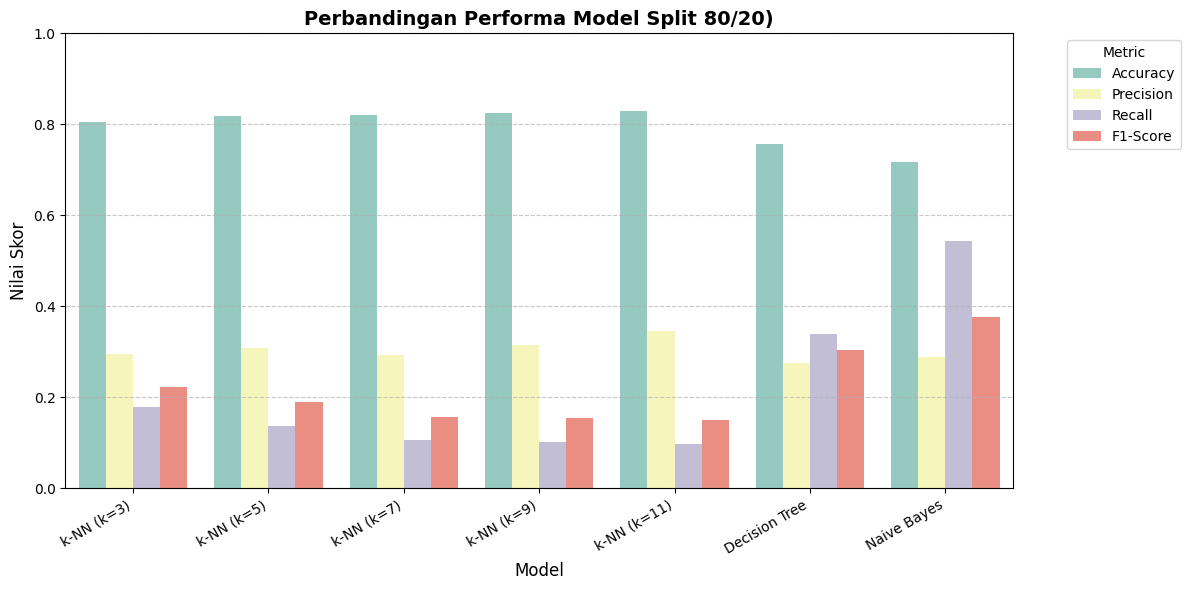

In [111]:
df_melt = df_results_8020.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='Set3')
plt.title("Perbandingan Performa Model Split 80/20)", fontsize=14, fontweight='bold')
plt.ylabel("Nilai Skor", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

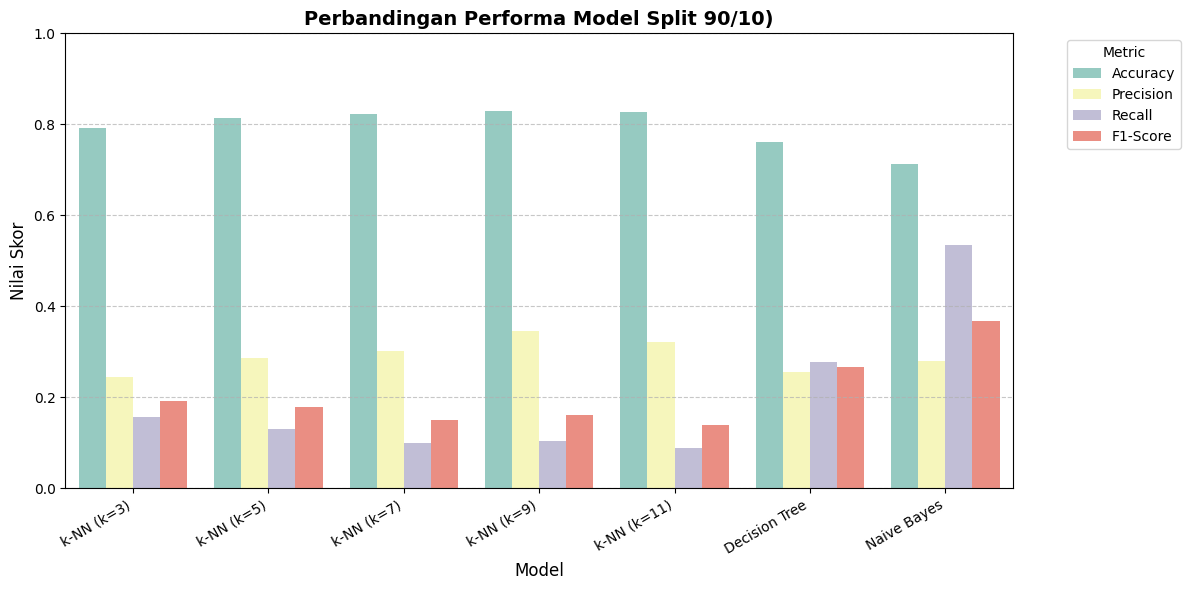

In [112]:
df_melt = df_results_9010.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melt, palette='Set3')
plt.title("Perbandingan Performa Model Split 90/10)", fontsize=14, fontweight='bold')
plt.ylabel("Nilai Skor", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
